<a href="https://colab.research.google.com/github/RohithMahadev/ipl-analytics/blob/main/ipl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
matches = pd.read_csv('matches.csv')
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2007,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2007,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2007,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2007,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/9/2007,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,5/5/2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,7/5/2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,8/5/2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/5/2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [ ]:
teams = matches.team1.append(matches.team2)
teams_df = pd.DataFrame(teams)
teams_df.columns = ['team']
count_match_series = teams_df.groupby(teams_df.team).team.count()
count_match_df = pd.DataFrame(count_match_series)
count_match_df.columns = ['countplayed']
count_match_df.reset_index(inplace=True)
count_match_df.sort_values('team')
team_sorted = count_match_df.team
played_sorted = count_match_df.countplayed

In [ ]:
count_match_df

,team,countplayed
0,Chennai Super Kings,164
1,Deccan Chargers,75
2,Delhi Capitals,16
3,Delhi Daredevils,161
4,Gujarat Lions,30
5,Kings XI Punjab,176
6,Kochi Tuskers Kerala,14
7,Kolkata Knight Riders,178
8,Mumbai Indians,187
9,Pune Warriors,46


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Matches')

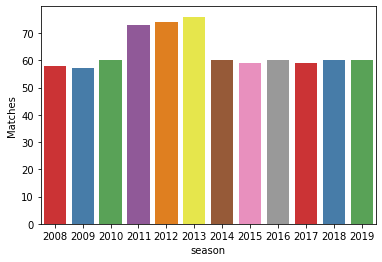

In [ ]:
ax=sns.countplot('season',data=matches,palette="Set1")
plt.ylabel('Matches')


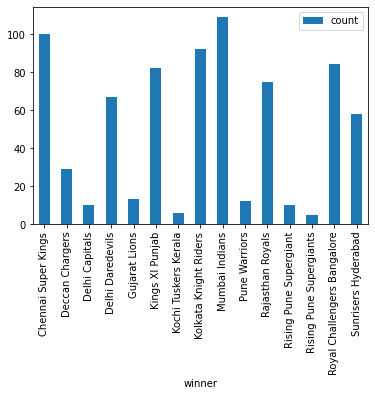

In [ ]:
matches.groupby('winner')['winner'].agg(['count']).reset_index().plot(x='winner',y='count',kind='bar')

Sorted values removal

In [ ]:
x = matches.groupby('winner')['winner'].agg(['count']).sort_values('count').reset_index()
x

,winner,count
0,Rising Pune Supergiants,5
1,Kochi Tuskers Kerala,6
2,Delhi Capitals,10
3,Rising Pune Supergiant,10
4,Pune Warriors,12
5,Gujarat Lions,13
6,Deccan Chargers,29
7,Sunrisers Hyderabad,58
8,Delhi Daredevils,67
9,Rajasthan Royals,75


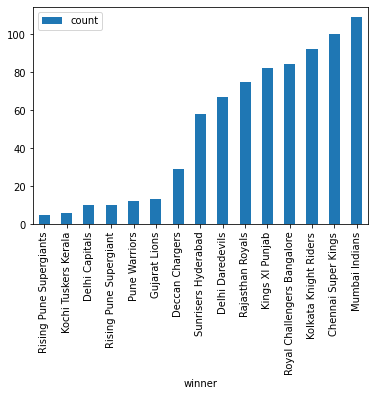

In [ ]:
x.plot(x='winner',y='count',kind='bar')

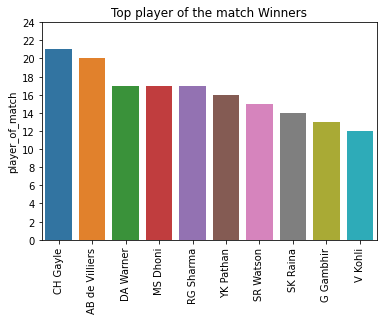

In [ ]:
top_players = matches.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
sns.barplot(x = top_players.index, y = top_players, orient='v'); #palette="Blues");
plt.xticks(rotation=90)
plt.yticks(range(0,25,2))
plt.show()

In [ ]:
csk = matches[(matches["team1"]=="Chennai Super Kings") & (matches["winner"]=="Chennai Super Kings")]
csk

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
60,61,2008,Chandigarh,4/19/2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
66,67,2008,Chennai,4/23/2008,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
73,74,2008,Bangalore,4/28/2008,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin,NaN
90,91,2008,Chennai,5/10/2008,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Chennai Super Kings,18,0,L Balaji,"MA Chidambaram Stadium, Chepauk",AV Jayaprakash,BG Jerling,NaN
121,122,2009,Port Elizabeth,4/20/2009,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,92,0,M Muralitharan,St George's Park,BG Jerling,SJA Taufel,NaN
136,137,2009,Centurion,4/30/2009,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,38,0,SK Raina,SuperSport Park,GAV Baxter,RE Koertzen,NaN
140,141,2009,Johannesburg,5/2/2009,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,field,normal,0,Chennai Super Kings,18,0,SB Jakati,New Wanderers Stadium,DJ Harper,RE Koertzen,NaN
143,144,2009,East London,5/4/2009,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,normal,0,Chennai Super Kings,78,0,MS Dhoni,Buffalo Park,BR Doctrove,M Erasmus,NaN
148,149,2009,Centurion,5/7/2009,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,1,Chennai Super Kings,12,0,ML Hayden,SuperSport Park,DJ Harper,TH Wijewardene,NaN
168,169,2009,Durban,5/20/2009,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,24,0,M Muralitharan,Kingsmead,BG Jerling,SJA Taufel,NaN


In [ ]:
csk.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,51.000000,51.000000,51.000000,51.000000,51.0
mean,1410.058824,2012.411765,0.019608,34.803922,0.0
std,3075.545060,3.080107,0.140028,28.002871,0.0
min,61.000000,2008.000000,0.000000,1.000000,0.0
25%,221.500000,2010.000000,0.000000,13.000000,0.0
50%,352.000000,2012.000000,0.000000,24.000000,0.0
75%,498.500000,2014.500000,0.000000,51.500000,0.0
max,11341.000000,2019.000000,1.000000,97.000000,0.0


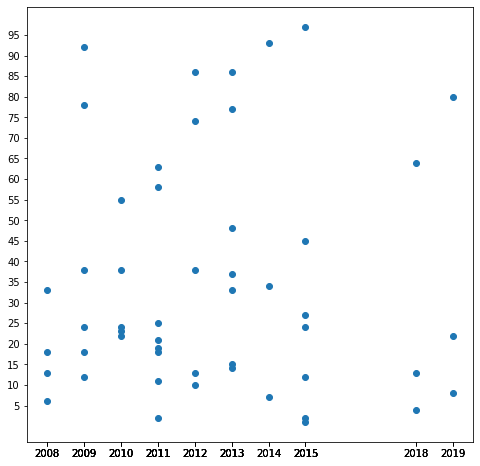

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(csk['season'],csk['win_by_runs'])
plt.xticks(csk['season'])
plt.yticks([5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



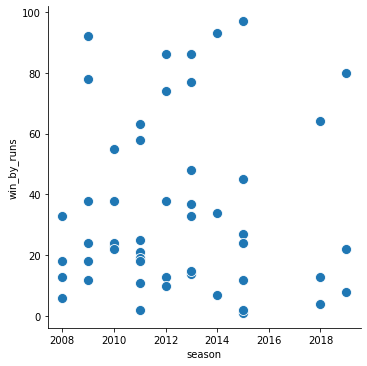

In [ ]:

sns.relplot(csk['season'],csk['win_by_runs'],marker ='o', s=100)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



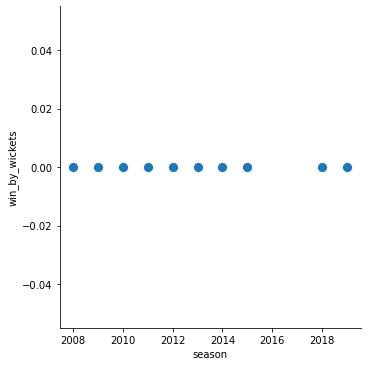

In [ ]:
sns.relplot(csk['season'],csk['win_by_wickets'],marker ='o', s=100)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



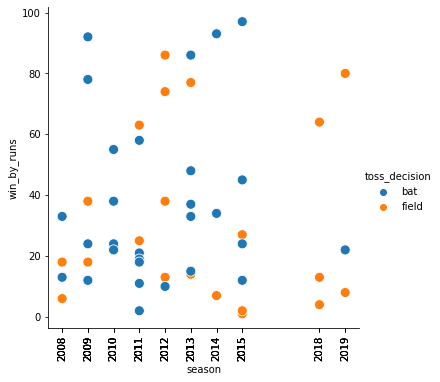

In [ ]:
sns.relplot(csk['season'],csk['win_by_runs'],marker ='o', s=100,hue=csk['toss_decision'])
plt.xticks(csk['season'],rotation = 90)
plt.show()

In [ ]:
csk.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



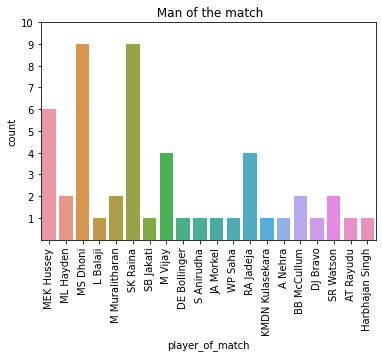

In [ ]:
sns.countplot(csk['player_of_match'])
plt.xticks(rotation=90)
plt.yticks([1,2,3,4,5,6,7,8,9,10])
plt.title(' Man of the match')
plt.show()

In [ ]:
y = np.arange(15)
mm = [go.Bar(
   x = matches['winner'],
   y = matches['win_by_runs']
)]
fig = go.Figure(data=mm)
iplot(fig)

In [ ]:
fig = px.scatter_3d(csk,x ='season',y='win_by_runs',z='win_by_wickets',symbol = 'toss_decision',color = 'toss_decision')
fig

In [ ]:
csk = matches[(matches["team1"]=="Chennai Super Kings") | (matches["team2"]=="Chennai Super Kings")]
csk

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
60,61,2008,Chandigarh,4/19/2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
66,67,2008,Chennai,4/23/2008,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
70,71,2008,Chennai,4/26/2008,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,0,Chennai Super Kings,0,9,JDP Oram,"MA Chidambaram Stadium, Chepauk",BF Bowden,AV Jayaprakash,NaN
73,74,2008,Bangalore,4/28/2008,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin,NaN
78,79,2008,Chennai,5/2/2008,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Delhi Daredevils,0,8,V Sehwag,"MA Chidambaram Stadium, Chepauk",BF Bowden,K Hariharan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,11341,2019,Chennai,1/5/2019,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,normal,0,Chennai Super Kings,80,0,MS Dhoni,M. A. Chidambaram Stadium,Anil Dandekar,Nitin Menon,Ian Gould
750,11346,2019,Mohali,5/5/2019,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford
752,11412,2019,Chennai,7/5/2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
754,11414,2019,Visakhapatnam,10/5/2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [ ]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
csk["team1_code"] = lb_make.fit_transform(csk["team1"])
csk["team2_code"] = lb_make.fit_transform(csk["team2"])
csk["winner_code"] = lb_make.fit_transform(csk["winner"])
csk[["team1", "team1_code"]].head(11)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,team1,team1_code
60,Chennai Super Kings,0
66,Chennai Super Kings,0
70,Kolkata Knight Riders,5
73,Chennai Super Kings,0
78,Chennai Super Kings,0
82,Chennai Super Kings,0
84,Chennai Super Kings,0
86,Delhi Daredevils,3
90,Chennai Super Kings,0
95,Chennai Super Kings,0


In [ ]:
csk[["team2", "team2_code"]].head(11)

,team2,team2_code
60,Kings XI Punjab,4
66,Mumbai Indians,7
70,Chennai Super Kings,0
73,Royal Challengers Bangalore,10
78,Delhi Daredevils,3
82,Rajasthan Royals,9
84,Deccan Chargers,1
86,Chennai Super Kings,0
90,Kings XI Punjab,4
95,Mumbai Indians,7


In [ ]:
csk[["winner", "winner_code"]].head(11)

,winner,winner_code
60,Chennai Super Kings,0
66,Chennai Super Kings,0
70,Chennai Super Kings,0
73,Chennai Super Kings,0
78,Delhi Daredevils,2
82,Rajasthan Royals,8
84,Deccan Chargers,1
86,Chennai Super Kings,0
90,Chennai Super Kings,0
95,Mumbai Indians,6


In [ ]:
csk

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,team1_code,team2_code,winner_code
60,61,2008,Chandigarh,4/19/2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN,0,4,0
66,67,2008,Chennai,4/23/2008,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN,0,7,0
70,71,2008,Chennai,4/26/2008,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,0,Chennai Super Kings,0,9,JDP Oram,"MA Chidambaram Stadium, Chepauk",BF Bowden,AV Jayaprakash,NaN,5,0,0
73,74,2008,Bangalore,4/28/2008,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin,NaN,0,10,0
78,79,2008,Chennai,5/2/2008,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Delhi Daredevils,0,8,V Sehwag,"MA Chidambaram Stadium, Chepauk",BF Bowden,K Hariharan,NaN,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,11341,2019,Chennai,1/5/2019,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,normal,0,Chennai Super Kings,80,0,MS Dhoni,M. A. Chidambaram Stadium,Anil Dandekar,Nitin Menon,Ian Gould,0,2,0
750,11346,2019,Mohali,5/5/2019,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford,0,4,3
752,11412,2019,Chennai,7/5/2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,0,7,6
754,11414,2019,Visakhapatnam,10/5/2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,2,0,0


In [ ]:
final = pd.get_dummies(csk, prefix=['team1_code', 'team2_code'], columns=['team1_code', 'team2_code'])

X = csk[["team1_code","team2_code"]]
y = csk["winner_code"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0) 
rf.fit(X_train, y_train)
score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)
print("Training set accuracy: ", '%.3f'%(score)) 
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.728
Test set accuracy:  0.500
